In [7]:
#필요한 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
brand_df = pd.read_csv(r"C:\Users\user\OneDrive\문서\과제\2024-2\아이펠\brand.csv")
cars_df = pd.read_csv(r"C:\Users\user\OneDrive\문서\과제\2024-2\아이펠\cars.csv")

In [9]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [10]:
cars_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


# 1. 6개 컬럼에 결측값 채워주기

In [ ]:
# 1. Previous Owners: 0으로 대체
cars_df['Previous Owners'].fillna(0, inplace=True)

# 2. Engine: 최빈값으로 대체
engine_mode = cars_df['Engine'].mode()[0]
cars_df['Engine'].fillna(engine_mode, inplace=True)

# 3. Doors: 최빈값으로 대체
doors_mode = cars_df['Doors'].mode()[0]
cars_df['Doors'].fillna(doors_mode, inplace=True)

# 4. Seats: 최빈값으로 대체
seats_mode = cars_df['Seats'].mode()[0]
cars_df['Seats'].fillna(seats_mode, inplace=True)

# 5. Emission Class: Registration_Year을 기준으로 대체
def replace_emission_class(row):
    if pd.isna(row['Emission Class']):
        if row['Registration_Year'] >= 2015:
            return 'Euro 6'
        elif row['Registration_Year'] >= 2010:
            return 'Euro 5'
        else:
            return 'Euro 4'
    else:
        return row['Emission Class']

cars_df['Emission Class'] = cars_df.apply(replace_emission_class, axis=1)

# 6. Service history: Unknown 채워넣기
cars_df['Service history'].fillna('Unknown', inplace=True)

# 2. title에서 브랜드명 추출 후 brand_name 컬럼 생성 및 테이블 병합

In [12]:
cars_df['brand_name'] = cars_df['title'].str.split().str[0].str.upper()

brand_df['title'] = brand_df['title'].str.upper()

merged_df = pd.merge(cars_df, brand_df, left_on='brand_name', right_on='title', how='left')

merged_df.drop(columns=['title_y'], inplace=True)
merged_df.rename(columns={'title_x': 'title'}, inplace=True)


In [13]:
merged_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand_name,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,0.0,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,0.0,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,Unknown,VAUXHALL,United Kingdom


In [14]:
merged_df.isnull().sum()

title                0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
brand_name           0
country              0
dtype: int64

# 3. 원 핫 인코딩

In [15]:
encoded_df = pd.get_dummies(merged_df, columns=['Fuel type', 'Body type', 'Gearbox', 'Service history', 'country', 'Engine', 'Emission Class'], drop_first=False)

In [16]:
encoded_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats,brand_name,Fuel type_Diesel,Fuel type_Diesel Hybrid,...,Engine_4.8L,Engine_5.0L,Engine_5.5L,Engine_6.3L,Emission Class_Euro 1,Emission Class_Euro 2,Emission Class_Euro 3,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6
0,SKODA FABIA,6900,70189,2016,3.0,5.0,5.0,SKODA,True,False,...,False,False,False,False,False,False,False,False,False,True
1,VAUXHALL CORSA,1495,88585,2008,4.0,3.0,5.0,VAUXHALL,False,False,...,False,False,False,False,False,False,False,True,False,False
2,HYUNDAI I30,949,137000,2011,0.0,5.0,5.0,HYUNDAI,False,False,...,False,False,False,False,False,False,False,False,True,False
3,MINI HATCH,2395,96731,2010,5.0,3.0,4.0,MINI,False,False,...,False,False,False,False,False,False,False,True,False,False
4,VAUXHALL CORSA,1000,85000,2013,0.0,5.0,5.0,VAUXHALL,True,False,...,False,False,False,False,False,False,False,False,True,False


# 4. 레이블 인코딩

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoded_df = merged_df.copy()

columns_to_encode = ['Fuel type', 'Body type', 'Gearbox', 'Service history', 'country', 'Engine', 'Emission Class']

label_encoder = LabelEncoder()
for column in columns_to_encode:
    label_encoded_df[column] = label_encoder.fit_transform(label_encoded_df[column])

In [18]:
label_encoded_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand_name,country
0,SKODA FABIA,6900,70189,2016,3.0,0,4,6,1,5.0,5.0,5,1,SKODA,0
1,VAUXHALL CORSA,1495,88585,2008,4.0,3,4,4,1,3.0,5.0,3,0,VAUXHALL,10
2,HYUNDAI I30,949,137000,2011,0.0,3,4,6,1,5.0,5.0,4,1,HYUNDAI,7
3,MINI HATCH,2395,96731,2010,5.0,3,4,6,1,3.0,4.0,3,0,MINI,10
4,VAUXHALL CORSA,1000,85000,2013,0.0,0,4,5,1,5.0,5.0,4,1,VAUXHALL,10


# 5. 표준화 스케일링

In [19]:
from sklearn.preprocessing import StandardScaler

scaled_df = label_encoded_df.copy()

columns_to_scale = ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Doors', 'Seats']

scaler = StandardScaler()

scaled_df[columns_to_scale] = scaler.fit_transform(scaled_df[columns_to_scale])

In [20]:
scaled_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand_name,country
0,SKODA FABIA,0.248369,-0.282644,0.817401,0.693523,0,4,6,1,0.684357,0.171904,5,1,SKODA,0
1,VAUXHALL CORSA,-0.958098,0.184119,-0.756876,1.240948,3,4,4,1,-1.346407,0.171904,3,0,VAUXHALL,10
2,HYUNDAI I30,-1.079973,1.412557,-0.166522,-0.948750,3,4,6,1,0.684357,0.171904,4,1,HYUNDAI,7
3,MINI HATCH,-0.757206,0.390808,-0.363307,1.788372,3,4,6,1,-1.346407,-1.569335,3,0,MINI,10
4,VAUXHALL CORSA,-1.068589,0.093156,0.227047,-0.948750,0,4,5,1,0.684357,0.171904,4,1,VAUXHALL,10


# 6. 70%이상이면서 최소한의 주성분 분석(PCA)

In [21]:
from sklearn.decomposition import PCA

pca_df = scaled_df.copy()

pca = PCA(n_components=0.7)

numeric_columns = pca_df.select_dtypes(include=['float64', 'int64']).columns

pca_transformed_data = pca.fit_transform(pca_df[numeric_columns])

pca_columns = [f'PC{i+1}' for i in range(pca_transformed_data.shape[1])]
pca_df_reduced = pd.DataFrame(pca_transformed_data, columns=pca_columns)


In [22]:
explained_variance_ratio = pca.explained_variance_ratio_
n_components_selected = pca.n_components_

explained_variance_ratio, n_components_selected

(array([0.3744737 , 0.25088438, 0.14802393]), 3)

In [23]:
pca_df_reduced

,PC1,PC2,PC3
0,-0.678901,-0.646839,0.855167
1,1.653656,0.543835,0.818024
2,1.010674,-0.754727,-1.283535
3,1.607112,1.648617,1.695764
4,0.154308,-0.540606,-1.101590
...,...,...,...
3682,1.385427,-0.752006,0.709105
3683,0.070641,0.087074,-0.925359
3684,0.590568,-0.052644,-1.050535
3685,1.909028,-0.902562,-1.508746


# 7. 국가별 총 브랜드 개수

In [24]:
brand_count_by_country = brand_df['country'].value_counts()
brand_count_by_country

country
Japan             11
United Kingdom     8
Germany            6
United States      5
South Korea        4
France             4
Italy              4
Sweden             2
Czech Republic     1
Spain              1
Malaysia           1
Romania            1
Name: count, dtype: int64

# 8. 숫자형 컬럼간의 상관관계 계산

In [25]:
numeric_columns = scaled_df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = scaled_df[numeric_columns].corr()

high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)

high_corr_pairs_filtered = high_corr_pairs[(high_corr_pairs != 1) & (abs(high_corr_pairs) > 0.7)].drop_duplicates()

high_corr_pairs_filtered


Price  Registration_Year    0.722971
dtype: float64

# 9. 상관관계에 따른 히트맵

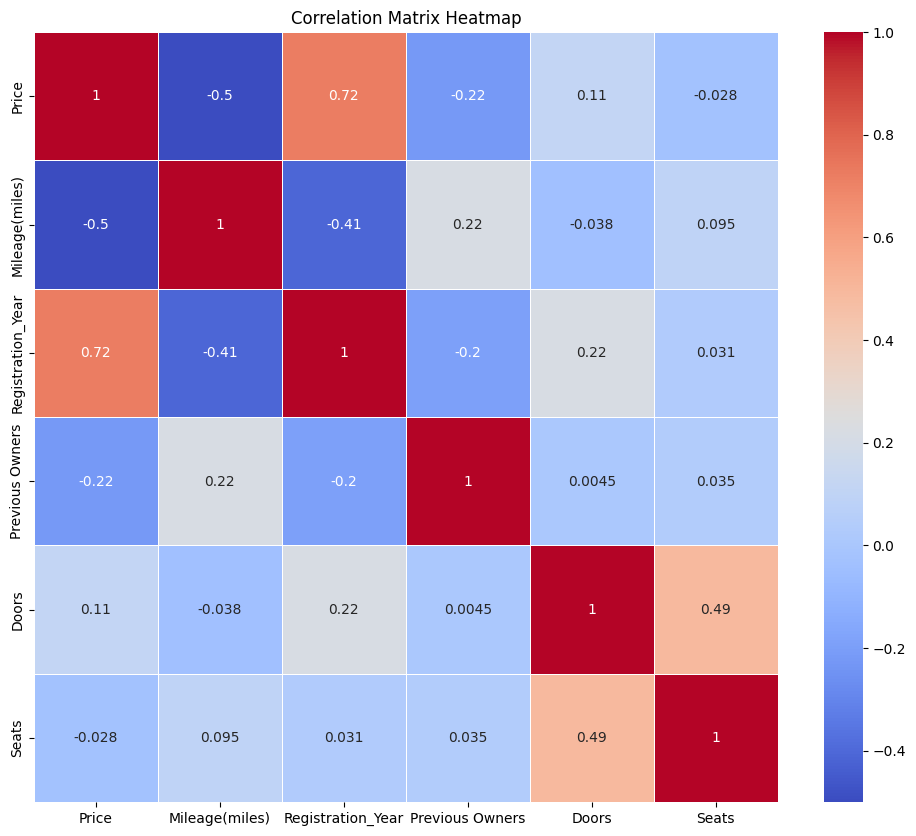

In [26]:
plt.figure(figsize=(12, 10))
sns.heatmap(scaled_df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**유효한 상관관계**
* 등록연도와 가격(최신차량일수록 비쌈)
* 주행거리와 가격(오래 달린 차량일수록 저렴함)